In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import *
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         11.807821        13.247445        40.245076        95.324586   
1         51.024167        81.531782        35.000493        45.383193   
2         13.702172        20.883888        29.119580        92.964963   
3         22.334762        95.811872        11.555129        19.470902   
4         47.653262        47.785286         6.282933        84.940249   
5         36.629153        71.438836         3.593120        25.595671   
6         17.233883        51.272754         1.622133        18.045915   
7          3.698212        57.470635        16.552110        85.615594   
8         48.924034        93.720765        74.311700        84.681922   
9         15.015167        94.287239        22.476938        55.198836   
10        16.434126        80.234462         3.948843        32.257

In [2]:
model = IntervalAgglomerativelustering(n_clusters=3, linkage='complete')

model.fit(random_data.get_intervals(),metric='euclidean',aggregate='mean')

print(model.get_labels())

[0 2 0 1 1 1 2 0 0 0 2 0 2 0 0 2 2 1 0 2 0 1 1 0 0 2 0 0 1 0]


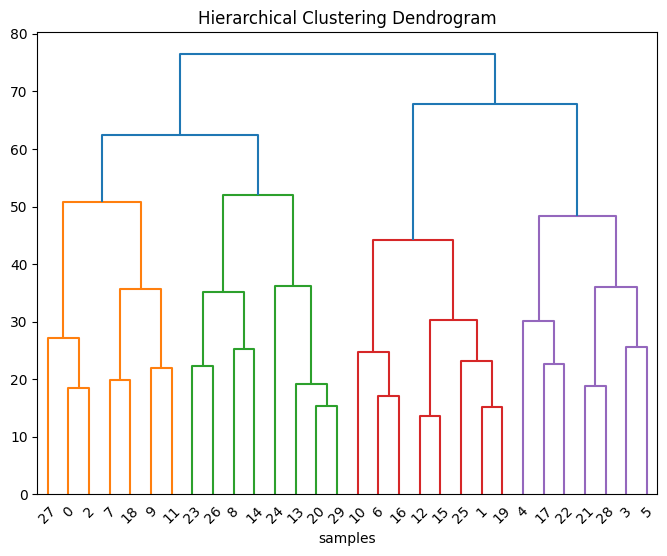

In [3]:
plt.figure(figsize=(8, 6))
ClusteringVisualization.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=3, max_iter=100,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.2750851 , 0.31544832, 0.40946659],
       [0.53075577, 0.17677625, 0.29246798],
       [0.12903249, 0.67523316, 0.19573435],
       [0.34342792, 0.38373172, 0.27284035],
       [0.15152019, 0.66979929, 0.17868052],
       [0.35613094, 0.43864841, 0.20522065],
       [0.48956061, 0.18356154, 0.32687784],
       [0.23383383, 0.33123109, 0.43493508],
       [0.18832531, 0.52819119, 0.2834835 ],
       [0.4011572 , 0.27555414, 0.32328866],
       [0.54338722, 0.12159418, 0.3350186 ],
       [0.31987554, 0.26553581, 0.41458865],
       [0.72790841, 0.07727956, 0.19481203],
       [0.26573065, 0.16253356, 0.57173578],
       [0.1340479 , 0.58112344, 0.28482867],
       [0.62122331, 0.09533803, 0.28343865],
       [0.55505971, 0.1235681 , 0.32137219],
       [0.13626471, 0.68017275, 0.18356254],
       [0.58596762, 0.11091937, 0.30311301],
       [0.64464575, 0.12466761, 0.23068664],
       [0.31132251, 0.13893273, 0.54974477],
       [0.17255864, 0.57398314, 0.25345823],
       [0.

In [5]:
model.get_hard_assignments()

array([2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 0, 2, 2, 1, 2])

In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 4, y = 4, n_dims = n_dims, sigma_init=3, sigma_final=1, learning_rate=0.5, total_iterations=100)

In [10]:
som.train_batch(random_data.get_intervals(), verbose= True)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)
# assignments[(i,j)] => [idx1, idx2, ...]

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


[Batch] Iter 0, QE=25.6409
[Batch] Iter 10, QE=24.8472
[Batch] Iter 20, QE=24.3902
[Batch] Iter 30, QE=24.2338
[Batch] Iter 40, QE=23.9198
[Batch] Iter 50, QE=23.2152
[Batch] Iter 60, QE=22.9123
[Batch] Iter 70, QE=20.6441
[Batch] Iter 80, QE=19.4823
[Batch] Iter 90, QE=18.5852
Neuron (3, 1) has these sample indices => [0, 27]
Neuron (0, 1) has these sample indices => [1]
Neuron (2, 0) has these sample indices => [2, 17]
Neuron (0, 0) has these sample indices => [3, 5]
Neuron (1, 0) has these sample indices => [4, 21, 22]
Neuron (0, 3) has these sample indices => [6, 16, 25]
Neuron (2, 1) has these sample indices => [7]
Neuron (3, 0) has these sample indices => [8, 14, 28]
Neuron (1, 1) has these sample indices => [9]
Neuron (1, 3) has these sample indices => [10, 18]
Neuron (2, 2) has these sample indices => [11, 26]
Neuron (0, 2) has these sample indices => [12, 15]
Neuron (3, 3) has these sample indices => [13, 20, 24, 29]
Neuron (1, 2) has these sample indices => [19]
Neuron (3, 2)